In [3]:
from google.colab import files
uploaded = files.upload()


Saving API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv to API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv


In [4]:
import pandas as pd

# Read the correct dataset
for fn in uploaded.keys():
    df = pd.read_csv(fn, skiprows=4)  # skip metadata rows

print("✅ Data Loaded Successfully!")
print(df.head())
print("\n📊 Columns available:")
print(df.columns.tolist())


✅ Data Loaded Successfully!
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018      

Enter the year (e.g., 1997): 1997
Enter chart type (bar/hist): bar


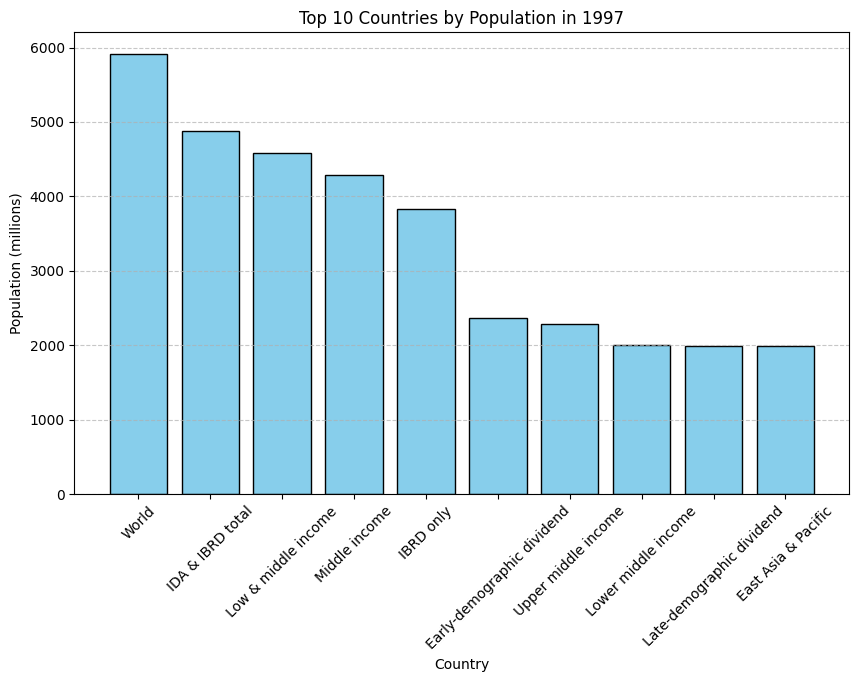

In [5]:
import matplotlib.pyplot as plt

year = input("Enter the year : ").strip()
chart_type = input("Enter chart type (bar/hist): ").strip().lower()

if year not in df.columns:
    print(f"❌ Column '{year}' not found. Check the available years above.")
else:
    df[year] = pd.to_numeric(df[year], errors='coerce')
    df_clean = df.dropna(subset=[year])

    if chart_type == 'bar':
        df_top = df_clean.nlargest(10, year)
        plt.figure(figsize=(10,6))
        plt.bar(df_top['Country Name'], df_top[year]/1e6, color='skyblue', edgecolor='black')
        plt.title(f"Top 10 Countries by Population in {year}")
        plt.xlabel("Country")
        plt.ylabel("Population (millions)")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    elif chart_type == 'hist':
        plt.figure(figsize=(8,5))
        plt.hist(df_clean[year]/1e6, bins=15, color='orange', edgecolor='black')
        plt.title(f"Population Distribution of Countries in {year}")
        plt.xlabel("Population (millions)")
        plt.ylabel("Number of Countries")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    else:
        print("❌ Invalid chart type. Please type 'bar' or 'hist'.")
